# Task a

In [34]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 5000
N = 200

0.2969600000001562


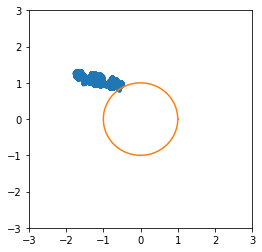

In [45]:
#np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = NaiveRandomWalk(X0, 100000, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

# MC simulation

In [32]:
walks = 10000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5,1]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 10000. Time needed = 2.78 s
Estimated variance: 0.4966611090328319
The estimated probability at [-1.5, 1] is: 0.5579 (using MC)
Confidence interval: [ 0.5579 +- 0.009735557335177392 ]	with P = 0.95%
20

Number of simulations: 10000. Time needed = 5.83 s
Estimated variance: 0.48711119647547946
The estimated probability at [-1.5, 1] is: 0.6129 (using MC)
Confidence interval: [ 0.6129 +- 0.00954835982855351 ]	with P = 0.95%
50

Number of simulations: 10000. Time needed = 13.39 s
Estimated variance: 0.4729836480821883
The estimated probability at [-1.5, 1] is: 0.6622 (using MC)
Confidence interval: [ 0.6622 +- 0.009271431446429501 ]	with P = 0.95%
100

Number of simulations: 10000. Time needed = 25.00 s
Estimated variance: 0.46642224965314116
The estimated probability at [-1.5, 1] is: 0.6802 (using MC)
Confidence interval: [ 0.6802 +- 0.009142814831512025 ]	with P = 0.95%
200

Number of simulations: 10000. Time needed = 576.17 s
Estimated variance: 0.461855790347

([0.5579, 0.6129, 0.6622, 0.6802, 0.6916, 0.7049, 0.7084, 0.701, 0.71, 0.727],
 [[0.5481644426648226, 0.5676355573351773],
  [0.6033516401714465, 0.6224483598285535],
  [0.6529285685535705, 0.6714714314464295],
  [0.671057185168488, 0.689342814831512],
  [0.6825466969615085, 0.7006533030384915],
  [0.6959593160979687, 0.7138406839020313],
  [0.6994904572357223, 0.7173095427642777],
  [0.6920253610943029, 0.709974638905697],
  [0.7011049057534715, 0.7188950942465284],
  [0.718266850202165, 0.735733149797835]])

In [ ]:
walks = 10000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5, 2.]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 10000. Time needed = 8.63 s
Estimated variance: 0.22622623152672428
The estimated probability at [-1.5, 2.0] is: 0.0541 (using MC)
Confidence interval: [ 0.0541 +- 0.004434489449029827 ]	with P = 0.95%
20

Number of simulations: 10000. Time needed = 17.60 s
Estimated variance: 0.25210139926535735
The estimated probability at [-1.5, 2.0] is: 0.0682 (using MC)
Confidence interval: [ 0.0682 +- 0.004941694814006664 ]	with P = 0.95%
50

Number of simulations: 10000. Time needed = 46.26 s
Estimated variance: 0.2638879945874172
The estimated probability at [-1.5, 2.0] is: 0.0753 (using MC)
Confidence interval: [ 0.0753 +- 0.005172735804447617 ]	with P = 0.95%
100

Number of simulations: 10000. Time needed = 90.05 s
Estimated variance: 0.27177066789775706
The estimated probability at [-1.5, 2.0] is: 0.0803 (using MC)
Confidence interval: [ 0.0803 +- 0.005327252066284038 ]	with P = 0.95%
200

Number of simulations: 10000. Time needed = 176.86 s
Estimated variance: 0.2

In [ ]:
walks = 10000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-2, 0]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int